In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA
df = pd.read_csv('/content/drive/MyDrive/Projects/CREDIT APPROVAL/clean_dataset.csv')

# ADD PRIMARY KEY
df.insert(0, 'ID', range(1, len(df) + 1))


# QUICK CLEANING: Fill numeric with mean, object with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

df.drop_duplicates(inplace=True)

# BASIC AGGREGATION / CENTRAL TENDENCY
agg_stats = df.describe(include='all')
print(agg_stats)


                ID      Gender         Age        Debt     Married  \
count   690.000000  690.000000  690.000000  690.000000  690.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    345.500000    0.695652   31.514116    4.758725    0.760870   
std     199.330128    0.460464   11.860245    4.978163    0.426862   
min       1.000000    0.000000   13.750000    0.000000    0.000000   
25%     173.250000    0.000000   22.670000    1.000000    1.000000   
50%     345.500000    1.000000   28.460000    2.750000    1.000000   
75%     517.750000    1.000000   37.707500    7.207500    1.000000   
max     690.000000    1.000000   80.250000   28.000000    1.000000   

        BankCustomer Industry Ethnicity  YearsEmployed  PriorDefault  \
count     690.000000      690       690     690.000000    690.000000   
unique         

/tmp/ipython-input-3195559419.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3195559419.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.head()

,ID,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,2,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,3,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,4,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,5,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


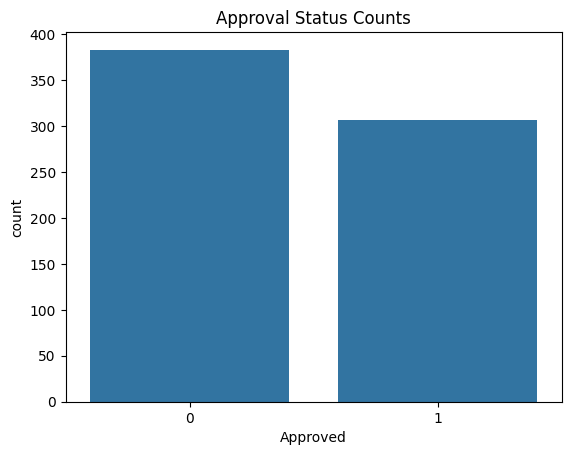

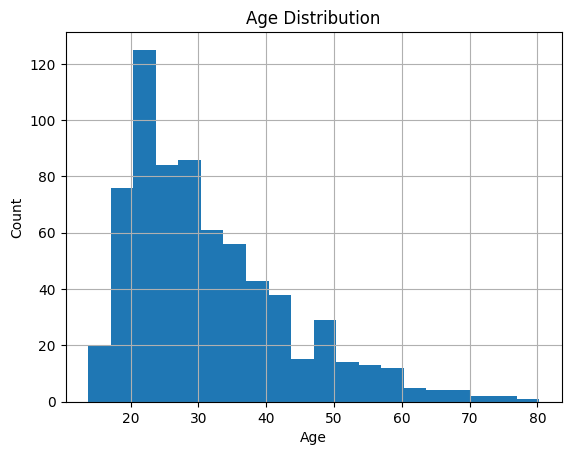

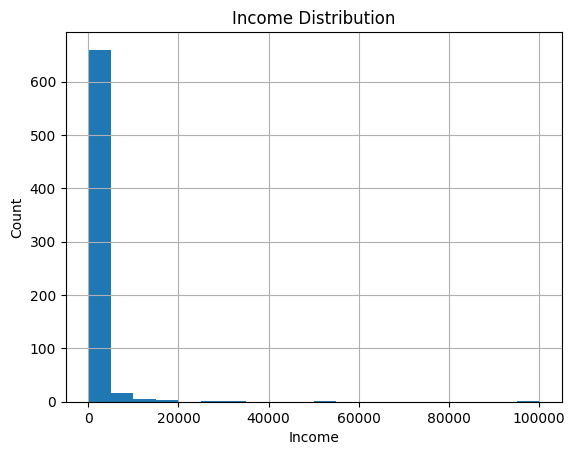

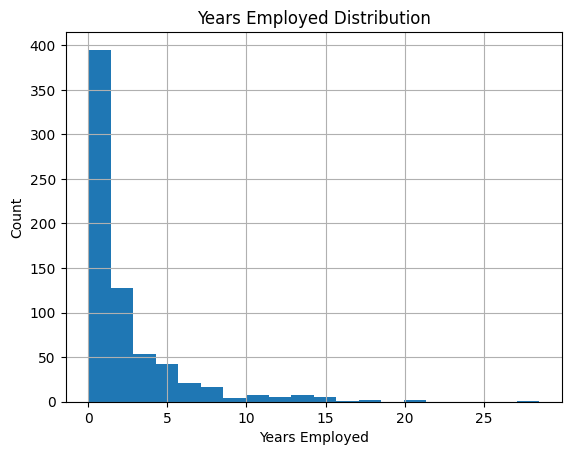

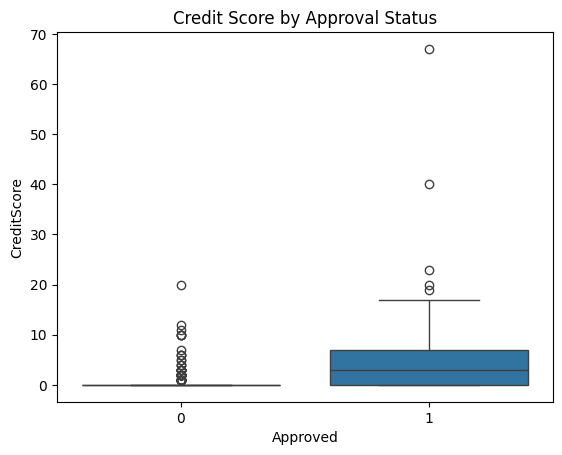

Averages by Approval Status:
                   ID    Gender        Age      Debt   Married  BankCustomer  \
Approved                                                                      
0         411.919060  0.707572  29.773029  3.839948  0.691906      0.691906   
1         262.638436  0.680782  33.686221  5.904951  0.846906      0.853420   

          YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
Approved                                                                       
0              1.257924      0.201044  0.224543     0.631854        0.443864   
1              3.427899      0.925081  0.680782     4.605863        0.475570   

             ZipCode       Income  
Approved                           
0         196.049608   198.605744  
1         161.208469  2038.859935  


In [ ]:
# APPROVAL COUNTS
sns.countplot(x='Approved', data=df)
plt.title('Approval Status Counts')
plt.show()

# AGE DISTRIBUTION
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# INCOME DISTRIBUTION
df['Income'].hist(bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# YEARSEMPLYOED DISTRIBUTION
df['YearsEmployed'].hist(bins=20)
plt.title('Years Employed Distribution')
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.show()

# CREDIT SCORE VS APPROVAL
sns.boxplot(x='Approved', y='CreditScore', data=df)
plt.title('Credit Score by Approval Status')
plt.show()

# GROUPED MEAN - WHO GETS APPROVED?
grouped = df.groupby('Approved').mean(numeric_only=True)
print("Averages by Approval Status:\n", grouped)


In [ ]:
# Get means of 'approved' applications for rules
approved = df[df['Approved'] == 1]
characteristics = {
    'Income_min': approved['Income'].mean(),
    'CreditScore_min': approved['CreditScore'].mean(),
    'YearsEmployed_min': approved['YearsEmployed'].mean(),
    'Debt_max': approved['Debt'].mean()
}
print("Typical Approved Applicant:", characteristics)


Typical Approved Applicant: {'Income_min': np.float64(2038.85993485342), 'CreditScore_min': np.float64(4.605863192182411), 'YearsEmployed_min': np.float64(3.427899022801302), 'Debt_max': np.float64(5.9049511400651475)}


In [ ]:
def detailed_predict_approval(user, df):
    # Compute statistics from approved applicants
    approved = df[df['Approved'] == 1]
    stats = {
        'Age': approved['Age'].median(), # Use median for robustness
        'CreditScore': approved['CreditScore'].median(),
        'Income': approved['Income'].median(),
        'Debt': approved['Debt'].quantile(0.75), # Upper quartile as max threshold
        'YearsEmployed': approved['YearsEmployed'].median()
    }
    # Key factors to check
    passed_checks = 0
    total_checks = 6

    if user['CreditScore'] >= stats['CreditScore']:  # Higher credit score preferred
        passed_checks += 1
    if user['Income'] >= stats['Income']:  # Adequate income
        passed_checks += 1
    if user['Debt'] <= stats['Debt']:  # Manageable debt
        passed_checks += 1
    if user['YearsEmployed'] >= stats['YearsEmployed']:  # Stable employment
        passed_checks += 1
    if user['Employed'] == 1:  # Should be employed
        passed_checks += 1

    # Optional: Check for prior defaults and marriage (add similar if available)
    if user['PriorDefault'] == 0: # No prior defaults
        passed_checks += 1
    total_checks += 1

    # Determine eligibility (e.g. 4 out of 5 checks passed)
    if passed_checks >= total_checks - 1:
        return "Likely Approved"
    else:
        return "Likely Not Approved"


In [ ]:
# Example
user = {'Income': 30000, 'CreditScore': 3, 'PriorDefault': 1, 'YearsEmployed': 5, 'Debt': 1}
print("Prediction for user:", predict_approval(user))


Prediction for user: Likely Not Approved


In [ ]:
# Example: Use with your loaded and cleaned DataFrame (df)

# Define example user input as dictionary
example_user = {
    'Age': 27,
    'Gender': 1,         # 1=Male, 0=Female
    'CreditScore': 3,
    'Employed': 1,       # 1=Employed, 0=Unemployed
    'Married': 1,        # 1=Married, 0=Single
    'Income': 30000,
    'Ethnicity': 2,      # Should match your encoding (e.g. 0,1,2,3)
    'Debt': 3.2,
    'YearsEmployed': 3,
    'PriorDefault': 1,   # 1=Prior default, 0=None
    'Citizen': 1         # Should match your encoding
}

# Predict using detailed rules
result = detailed_predict_approval(example_user, df)
print("Eligibility Result:", result)


Eligibility Result: Likely Not Approved


In [ ]:
# Save the cleaned DataFrame with the ID column as the first field
df.to_csv("credit_card_cleaned.csv", index=False)


In [ ]:
# Use describe() for numeric columns to get aggregation
agg_table = df.describe(include='all').T  # .T to transpose and match table style

# Save as a separate CSV
agg_table.to_csv("credit_card_aggregated_stats.csv")


In [ ]:
from google.colab import files
files.download("credit_card_cleaned.csv")
files.download("credit_card_aggregated_stats.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>